<a href="https://colab.research.google.com/github/annasvenbro/etudesnordiques/blob/main/Test_API_SRU_Sudoc_langue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test de l'API SRU du Sudoc pour la présence des fonds en langues étrangères dans les RCR du réseau

##Import des paquets nécessaires

In [1]:
import requests as rq
import xml.etree.ElementTree as et
import pandas as pd
import numpy as np

## Récupérer les données RCR du Sudoc

###Requêter le jeu de données en *open data* d'IdRef pour la liste des RCR via le *webservice* "listrcr" de l'ABES (jeu de données complet *a priori*, avec 2964 entrées).

In [5]:
liste_rcr=rq.get("https://www.idref.fr/services/listrcr") #On requête l'URL du webservice.
liste_rcr_text=liste_rcr.text #On voit la tête de la réponse.
liste_rcr_text

'\ufeffRCR\tLIBELLE\tILN\tPPN\tEMAIL\tADPHYSIQUE\tADPOSTALE\tMENTIONCOMP\tLIEUDIT\tVILLE\tCEDEX\tCDPOSTAL\tPAYS\tLATITUDE\tLONGITUDE\r\n="341725201"\tMONTPELLIER-ABES-Documentation\t1\t="050947664"\tnull\t227, avenue du Professeur Jean-Louis Viala\tBP 84308\tnull\tnull\tMontpellier\tCedex 5\t34193\tFR\t43.6363048\t3.8284966\r\n="341725202"\tMONTPELLIER-ABES-Tests\t1\t="252545958"\tnull\t227, avenue du Professeur Jean-Louis Viala\tCS 84308\tnull\tnull\tMontpellier\tCedex 5\t34193\tFR\tnull\tnull\r\n="341725298"\tABES-Licence nationale\t1\t="171075684"\tnull\t227, avenue du Professeur Jean-Louis Viala\tCS 84308\tnull\tnull\tMontpellier\tCedex 5\t34193\tFR\tnull\tnull\r\n="341725299"\tABES-Réseau Sudoc\t1\t="176652086"\tnull\t227, avenue du Professeur Jean-Louis Viala\tCS 84308\tnull\tnull\tMontpellier\tCedex 5\t34193\tFR\tnull\tnull\r\n="040702201"\tAIX-MARSEILLE1-IUT Digne\t4\t="068875975"\tnull\tRue Pasteur\tnull\tnull\tnull\tDigne-les-bains\tnull\t04000\tFR\t44.091451\t6.227104\r\n="

In [6]:
lines=liste_rcr_text.split("\n")#Transformation de la réponse en tableau.
header=lines[0].split("\t")
header[0]=header[0].strip("\ufeff") #Pour ne pas avoir de bug dans le dataframe final avec les BOM.
data=[line.split("\t") for line in lines[1:] if line]
df_rcr=pd.DataFrame(data,columns=header)
df_rcr

,RCR,LIBELLE,ILN,PPN,EMAIL,ADPHYSIQUE,ADPOSTALE,MENTIONCOMP,LIEUDIT,VILLE,CEDEX,CDPOSTAL,PAYS,LATITUDE,LONGITUDE\r
0,"=""341725201""",MONTPELLIER-ABES-Documentation,1,"=""050947664""",null,"227, avenue du Professeur Jean-Louis Viala",BP 84308,null,null,Montpellier,Cedex 5,34193,FR,43.6363048,3.8284966\r
1,"=""341725202""",MONTPELLIER-ABES-Tests,1,"=""252545958""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null\r
2,"=""341725298""",ABES-Licence nationale,1,"=""171075684""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null\r
3,"=""341725299""",ABES-Réseau Sudoc,1,"=""176652086""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null\r
4,"=""040702201""",AIX-MARSEILLE1-IUT Digne,4,"=""068875975""",null,Rue Pasteur,null,null,null,Digne-les-bains,null,04000,FR,44.091451,6.227104\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,"=""693822201""",LYON-Sources chrétiennes,436,"=""050957996""",blandine.sauvlet@mom.fr,"22, rue Sala",null,null,null,Lyon,null,69002,FR,45.7557864,4.829243\r
2960,"=""290192210""",BREST-CRBC,437,"=""050944061""",bibliothequeCRBC@univ-brest.fr,"20, rue Duquesne",CS 93837,null,null,Brest,Cedex 3,29238,FR,48.392045,-4.487625599999999\r
2961,"=""674825260""",STRASBOURG-INSP Centre de doc.,438,"=""197398456""",documentation@insp.gouv.fr,1,rue Sainte-Marguerite,null,null,Strasbourg,cedex,67080,FR,48.581558,7.737728\r
2962,"=""751072302""",PARIS-INSP Centre de doc.,438,"=""050961667""",documentation@insp.gouv.fr,2,avenue de l'Observatoire,null,null,Paris Cedex 06,null,75272,FR,48.844342,2.336374\r


In [7]:
df_rcr.columns = df_rcr.columns.str.strip("\ufeff") #Nettoyage du dataframe (BOM, signe égal, guillemets et autres caractères parasites).
df_rcr["RCR"]=df_rcr["RCR"].str.replace("=","")
df_rcr["RCR"]=df_rcr["RCR"].str.replace('"','')
df_rcr= df_rcr.rename(columns={"LONGITUDE\r":"LONGITUDE"})
df_rcr["LONGITUDE"]=df_rcr["LONGITUDE"].str.rstrip("\r")
df_rcr

,RCR,LIBELLE,ILN,PPN,EMAIL,ADPHYSIQUE,ADPOSTALE,MENTIONCOMP,LIEUDIT,VILLE,CEDEX,CDPOSTAL,PAYS,LATITUDE,LONGITUDE
0,341725201,MONTPELLIER-ABES-Documentation,1,"=""050947664""",null,"227, avenue du Professeur Jean-Louis Viala",BP 84308,null,null,Montpellier,Cedex 5,34193,FR,43.6363048,3.8284966
1,341725202,MONTPELLIER-ABES-Tests,1,"=""252545958""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null
2,341725298,ABES-Licence nationale,1,"=""171075684""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null
3,341725299,ABES-Réseau Sudoc,1,"=""176652086""",null,"227, avenue du Professeur Jean-Louis Viala",CS 84308,null,null,Montpellier,Cedex 5,34193,FR,null,null
4,040702201,AIX-MARSEILLE1-IUT Digne,4,"=""068875975""",null,Rue Pasteur,null,null,null,Digne-les-bains,null,04000,FR,44.091451,6.227104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,693822201,LYON-Sources chrétiennes,436,"=""050957996""",blandine.sauvlet@mom.fr,"22, rue Sala",null,null,null,Lyon,null,69002,FR,45.7557864,4.829243
2960,290192210,BREST-CRBC,437,"=""050944061""",bibliothequeCRBC@univ-brest.fr,"20, rue Duquesne",CS 93837,null,null,Brest,Cedex 3,29238,FR,48.392045,-4.487625599999999
2961,674825260,STRASBOURG-INSP Centre de doc.,438,"=""197398456""",documentation@insp.gouv.fr,1,rue Sainte-Marguerite,null,null,Strasbourg,cedex,67080,FR,48.581558,7.737728
2962,751072302,PARIS-INSP Centre de doc.,438,"=""050961667""",documentation@insp.gouv.fr,2,avenue de l'Observatoire,null,null,Paris Cedex 06,null,75272,FR,48.844342,2.336374


###Sélection des données pertinentes destinées à alimenter le *dataframe* par RCR à construire pour une langue donnée

Maintenant, il faut ne retenir dans le *dataframe* que 1. le n°RCR de ces bibliothèques, 2.le nom complet, 3. les coordonnées géographiques.

In [ ]:
df_rcr=df_rcr.filter(regex='^RCR$|^LIBELLE$|^LATITUDE$|^LONGITUDE$')#Sinon on a un bug à cause des BOM.
df_rcr

,RCR,LIBELLE,LATITUDE,LONGITUDE
0,341725201,MONTPELLIER-ABES-Documentation,43.6363048,3.8284966
1,341725202,MONTPELLIER-ABES-Tests,null,null
2,341725298,ABES-Licence nationale,null,null
3,341725299,ABES-Réseau Sudoc,null,null
4,040702201,AIX-MARSEILLE1-IUT Digne,44.091451,6.227104
...,...,...,...,...
2959,693822201,LYON-Sources chrétiennes,45.7557864,4.829243
2960,290192210,BREST-CRBC,48.392045,-4.487625599999999
2961,674825260,STRASBOURG-INSP Centre de doc.,48.581558,7.737728
2962,751072302,PARIS-INSP Centre de doc.,48.844342,2.336374


##Établir un *dataframe* avec tous les résultats par RCR pour une langue donnée

###Création de la fonction de requête en fonction du numéro RCR et de la langue

In [ ]:
langue_fr=input("Quelle est la langue dont vous souhaiteriez obtenir une cartographie des fonds dans le Sudoc ? ")#On pose la question de la langue à requêter.

Quelle est la langue dont vous souhaiteriez obtenir une cartographie des fonds dans le Sudoc ? wolof


In [ ]:
#À cette variable, on va en associer une autre correspondant au code ISO 639-2 dont se sert l'API du Sudoc pour ses codes de langue.
langues=rq.get("https://www.loc.gov/standards/iso639-2/ISO-639-2_utf-8.txt") #On va donc créer un dataframe avec les codes de langues, à partir de la liste publiée par la Library of Congress.
langues.encoding="utf-8"
langues_text=langues.text.lstrip("\ufeff") #Encore une fois, pour ne pas avoir de bug dans le dataframe final avec les BOM.
langues_text

"aar||aa|Afar|afar\nabk||ab|Abkhazian|abkhaze\nace|||Achinese|aceh\nach|||Acoli|acoli\nada|||Adangme|adangme\nady|||Adyghe; Adygei|adyghé\nafa|||Afro-Asiatic languages|afro-asiatiques, langues\nafh|||Afrihili|afrihili\nafr||af|Afrikaans|afrikaans\nain|||Ainu|aïnou\naka||ak|Akan|akan\nakk|||Akkadian|akkadien\nalb|sqi|sq|Albanian|albanais\nale|||Aleut|aléoute\nalg|||Algonquian languages|algonquines, langues\nalt|||Southern Altai|altai du Sud\namh||am|Amharic|amharique\nang|||English, Old (ca.450-1100)|anglo-saxon (ca.450-1100)\nanp|||Angika|angika\napa|||Apache languages|apaches, langues\nara||ar|Arabic|arabe\narc|||Official Aramaic (700-300 BCE); Imperial Aramaic (700-300 BCE)|araméen d'empire (700-300 BCE)\narg||an|Aragonese|aragonais\narm|hye|hy|Armenian|arménien\narn|||Mapudungun; Mapuche|mapudungun; mapuche; mapuce\narp|||Arapaho|arapaho\nart|||Artificial languages|artificielles, langues\narw|||Arawak|arawak\nasm||as|Assamese|assamais\nast|||Asturian; Bable; Leonese; Asturleonese|as

In [ ]:
lines=langues_text.split("\n") #Création du dataframe des différentes langues.
data_list=[]
for line in lines:
    if line.strip() != "":
        columns = line.split("|")
        data_list.append({
            "Code":columns[0],
            "Bibliographic":columns[1],
            "Terminology":columns[2],
            "French":columns[4]
        })
df_langues=pd.DataFrame(data_list)
df_langues

,Code,Bibliographic,Terminology,French
0,aar,,aa,afar
1,abk,,ab,abkhaze
2,ace,,,aceh
3,ach,,,acoli
4,ada,,,adangme
...,...,...,...,...
482,znd,,,"zandé, langues"
483,zul,,zu,zoulou
484,zun,,,zuni
485,zxx,,,pas de contenu linguistique; non applicable


In [ ]:
langue=df_langues[df_langues["French"].str.lower()==langue_fr.lower()]["Code"].values[0]
langue

'wol'

Attention !!! API du Sudoc distingue 10 langues dans autres pour lesquelles il faut utiliser la limitation LAN au lieu de LAI dans la requête API. On va donc devoir faire une disjonction entre les langues qu'il faudra requêter avec le code "LAN" et celle avec le code "LAI".

In [ ]:
LAN=["ger","eng","spa","fre","ita","lat","dut","pol","por","rus"] #On définit la liste des codes de langues centrales devant être requêtées avec le code "LAN" dans l'API du Sudoc.

In [ ]:
def get_langue_sudoc(RCR,langue):
  if langue in LAN:
   req=rq.get(f"https://www.sudoc.abes.fr/cbs/sru/?operation=searchRetrieve&version=1.1&recordSchema=unimarc&query=rbc%3D{RCR}%20and%20lan%3D{langue}")
  else:req=rq.get(f"https://www.sudoc.abes.fr/cbs/sru/?operation=searchRetrieve&version=1.1&recordSchema=unimarc&query=rbc%3D{RCR}%20and%20lai%3D{langue}")
  root_sudoc=et.fromstring(req.content)
  for child in root_sudoc.findall("{http://www.loc.gov/zing/srw/}numberOfRecords"):
    return child.text

In [ ]:
get_langue_sudoc(751052116,langue) #On teste la fonction pour le Fonds Général de la BSG.

'15'

###Création d'un *dataframe* des résultats pour tous les RCR pour une langue donnée (celle donnée par la réponse à la question "Quelle est la langue dont vous souhaiteriez obtenir une cartographie des fonds dans le Sudoc ? ")

In [ ]:
df_rcr["Notices"]=df_rcr.apply(lambda row: get_langue_sudoc(row["RCR"],langue), axis=1)
df_rcr

<ipython-input-13-7b6908c24996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcr["Notices"]=df_rcr.apply(lambda row: get_langue_sudoc(row["RCR"],langue), axis=1)


,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices
0,341725201,MONTPELLIER-ABES-Documentation,43.6363048,3.8284966,0
1,341725202,MONTPELLIER-ABES-Tests,null,null,0
2,341725298,ABES-Licence nationale,null,null,0
3,341725299,ABES-Réseau Sudoc,null,null,0
4,040702201,AIX-MARSEILLE1-IUT Digne,44.091451,6.227104,0
...,...,...,...,...,...
2959,693822201,LYON-Sources chrétiennes,45.7557864,4.829243,0
2960,290192210,BREST-CRBC,48.392045,-4.487625599999999,0
2961,674825260,STRASBOURG-INSP Centre de doc.,48.581558,7.737728,0
2962,751072302,PARIS-INSP Centre de doc.,48.844342,2.336374,0


La mise à jour du *dataframe* prend un certain temps (33 minutes pour le vietnamien)...

In [ ]:
df_rcr.dtypes #Ce n'est toujours pas propre pour les notices, qui ne sont pas au format numérique.

RCR          object
LIBELLE      object
LATITUDE     object
LONGITUDE    object
Notices      object
dtype: object

In [ ]:
df_rcr["Notices"]=pd.to_numeric(df_rcr["Notices"]) #On veut que cette colonne contienne des données numériques.
df_rcr.dtypes# On vérifie.

<ipython-input-16-b1398026ecd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcr["Notices"]=pd.to_numeric(df_rcr["Notices"]) #On veut que cette colonne contienne des données numériques.


RCR          object
LIBELLE      object
LATITUDE     object
LONGITUDE    object
Notices       int64
dtype: object

In [ ]:
df_rcr=df_rcr[df_rcr["Notices"]!=0] #On supprime les lignes des RCR qui n'ont pas de notices dans la langue concernée.
df_rcr

,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices
1,341725299,ABES-Réseau Sudoc,null,null,3
4,840072203,AIX-MRS-Avignon-Inspé,43.9271223,4.8094255,1
12,130552103,AIX-MRS-Marseille-Timone-Med-Odo,43.288811,5.401957,1
13,130552104,AIX-MRS-Marseille-St-Charl.-Sci.,43.3045903,5.3788429,3
30,130559904,AIX-MRS-Bib. electronique,43.516025,5.448238,1
...,...,...,...,...,...
2942,762122301,ROUEN-Ecole Architecture,49.4388933,1.1370663,1
2945,690812302,LYON-emlyon business school,45.7860885,4.764149,1
2950,490072306,ANGERS-TALM Bibliothèque,47.4663871,0.55098421,1
2952,940185201,CHARENTON-LE-PONT-MPP,48.8223745,2.4035451,1


In [ ]:
df_rcr=df_rcr.sort_values(["Notices"],ascending=False)#On retrie le dataframe pour afficher d'abord les RCR ayant le plus grand nombre de documents.
df_rcr

,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices
1250,751132108,PARIS-BULAC,48.8274879,2.3761096,9433
1253,751162305,PARIS-EFEO,48.8644739,2.2921732,3474
425,693872207,LYON-IAO,45.7318649331497,4.8335776058044075,2309
1241,992432301,HANOI-EFEO,21.0213301,105.8486473,2180
1361,130552318,MARSEILLE-MAP,43.304249,5.377824299999999,396
...,...,...,...,...,...
977,660162201,BANYULS/MER-BSU-Obs.Océano.,42.4804,3.13299,1
982,930662202,SAINT DENIS-Cartothèque,48.94524209999999,2.3639438,1
312,974112101,ST DENIS/REUNION-Droit Lettres,-20.902735,55.48329,1
984,751162101,PARIS-DAUPHINE-BU,48.871159,2.2745166,1


##Représentations cartographiques et diagrammes

###Création du *geodataframe* et carte des RCR qui ont des notices dans la langue concernée

####Installation et importation des paquets nécessaires à la cartographie

In [ ]:
pip install geopandas

In [ ]:
pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 977.2 kB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pyproj import CRS
import mapclassify

####Préparation des données du dataframe précédent et création du geodataframe

In [ ]:
df_rcr["LATITUDE"].replace("null",None,inplace=True) #On doit s'occuper des RCR qui n'ont pas de données de géolocalisation.
df_rcr["LONGITUDE"].replace("null",None,inplace=True)

<ipython-input-17-1ddbd2cd2543>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcr["LATITUDE"].replace("null",None,inplace=True) #On doit s'occuper des RCR qui n'ont pas de données de géolocalisation.
<ipython-input-17-1ddbd2cd2543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcr["LONGITUDE"].replace("null",None,inplace=True)


In [ ]:
def create_point(row):
    latitude=float(row["LATITUDE"]) if row["LATITUDE"] is not None else None
    longitude=float(row["LONGITUDE"]) if row["LONGITUDE"] is not None else None
    return Point(longitude,latitude) if latitude and longitude else None

In [ ]:
df_rcr["geometry"] =df_rcr.apply(create_point,axis=1)

ValueError: ignored

In [ ]:
gdf=gpd.GeoDataFrame(df_rcr,geometry="geometry")

In [ ]:
gdf

,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices,geometry
1250,751132108,PARIS-BULAC,48.8274879,2.3761096,9433,POINT (2.37611 48.82749)
1253,751162305,PARIS-EFEO,48.8644739,2.2921732,3474,POINT (2.29217 48.86447)
425,693872207,LYON-IAO,45.7318649331497,4.8335776058044075,2309,POINT (4.83358 45.73186)
1241,992432301,HANOI-EFEO,21.0213301,105.8486473,2180,POINT (105.84865 21.02133)
1361,130552318,MARSEILLE-MAP,43.304249,5.377824299999999,396,POINT (5.37782 43.30425)
...,...,...,...,...,...,...
977,660162201,BANYULS/MER-BSU-Obs.Océano.,42.4804,3.13299,1,POINT (3.13299 42.48040)
982,930662202,SAINT DENIS-Cartothèque,48.94524209999999,2.3639438,1,POINT (2.36394 48.94524)
312,974112101,ST DENIS/REUNION-Droit Lettres,-20.902735,55.48329,1,POINT (55.48329 -20.90273)
984,751162101,PARIS-DAUPHINE-BU,48.871159,2.2745166,1,POINT (2.27452 48.87116)


####Création de la carte repérant les RCR qui ont des documents dans la langue souhaitée

L'objet de cette première visualitation cartographique est de repérer les RCR en question, pas de présenter des éléments quantitatifs.

####Import du fond de carte

In [ ]:
fond_de_carte=gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/087ab701-f21d-4046-b53e-8b647baf505d",crs="EPSG:2154") #On charge les données de la carte de France sur data.gouv.fr, en Lambert 93.
# On part d'ici "https://www.data.gouv.fr/fr/datasets/carte-des-101-departements-francais-projetes-en-lambert-sous-la-metropole/, comme ça tous les RCR du Sudoc seront représentés.

####Mise à la norme de projection Lambert93 du *geodataframe*

In [ ]:
print(gdf.crs)#Le CRS n'est pas défini pour le geodataframe !

None


In [ ]:
gdf.set_crs(epsg=4326,inplace=True)#On définit bien la colonne "geometry" avec le CRS classique "longitude/latitude".

,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices,geometry
1250,751132108,PARIS-BULAC,48.8274879,2.3761096,9433,POINT (2.37611 48.82749)
1253,751162305,PARIS-EFEO,48.8644739,2.2921732,3474,POINT (2.29217 48.86447)
425,693872207,LYON-IAO,45.7318649331497,4.8335776058044075,2309,POINT (4.83358 45.73186)
1241,992432301,HANOI-EFEO,21.0213301,105.8486473,2180,POINT (105.84865 21.02133)
1361,130552318,MARSEILLE-MAP,43.304249,5.377824299999999,396,POINT (5.37782 43.30425)
...,...,...,...,...,...,...
977,660162201,BANYULS/MER-BSU-Obs.Océano.,42.4804,3.13299,1,POINT (3.13299 42.48040)
982,930662202,SAINT DENIS-Cartothèque,48.94524209999999,2.3639438,1,POINT (2.36394 48.94524)
312,974112101,ST DENIS/REUNION-Droit Lettres,-20.902735,55.48329,1,POINT (55.48329 -20.90273)
984,751162101,PARIS-DAUPHINE-BU,48.871159,2.2745166,1,POINT (2.27452 48.87116)


In [ ]:
print(gdf.crs) #On vérifie que c'est bon.

EPSG:4326


In [ ]:
gdf=gdf.to_crs(epsg=2154) #On convertit les coordonnées classiques selon la projection Lambert93.

In [ ]:
gdf=gdf.to_crs(fond_de_carte.crs) #On convertit la projection cartographique.

In [ ]:
gdf

,RCR,LIBELLE,LATITUDE,LONGITUDE,Notices,geometry
1250,751132108,PARIS-BULAC,48.8274879,2.3761096,9433,POINT (654197.726 6858784.156)
1253,751162305,PARIS-EFEO,48.8644739,2.2921732,3474,POINT (648072.642 6862948.573)
425,693872207,LYON-IAO,45.7318649331497,4.8335776058044075,2309,POINT (842584.600 6516352.868)
1241,992432301,HANOI-EFEO,21.0213301,105.8486473,2180,POINT (9346249.311 10278547.350)
1361,130552318,MARSEILLE-MAP,43.304249,5.377824299999999,396,POINT (893015.535 6247915.865)
...,...,...,...,...,...,...
977,660162201,BANYULS/MER-BSU-Obs.Océano.,42.4804,3.13299,1,POINT (710951.146 6153403.893)
982,930662202,SAINT DENIS-Cartothèque,48.94524209999999,2.3639438,1,POINT (653410.079 6871884.892)
312,974112101,ST DENIS/REUNION-Droit Lettres,-20.902735,55.48329,1,POINT (10188228.004 547117.124)
984,751162101,PARIS-DAUPHINE-BU,48.871159,2.2745166,1,POINT (646784.190 6863703.655)


####Tracé de la carte

Text(0.5, 1.0, 'Les fonds en Vietnamien dans le Sudoc')

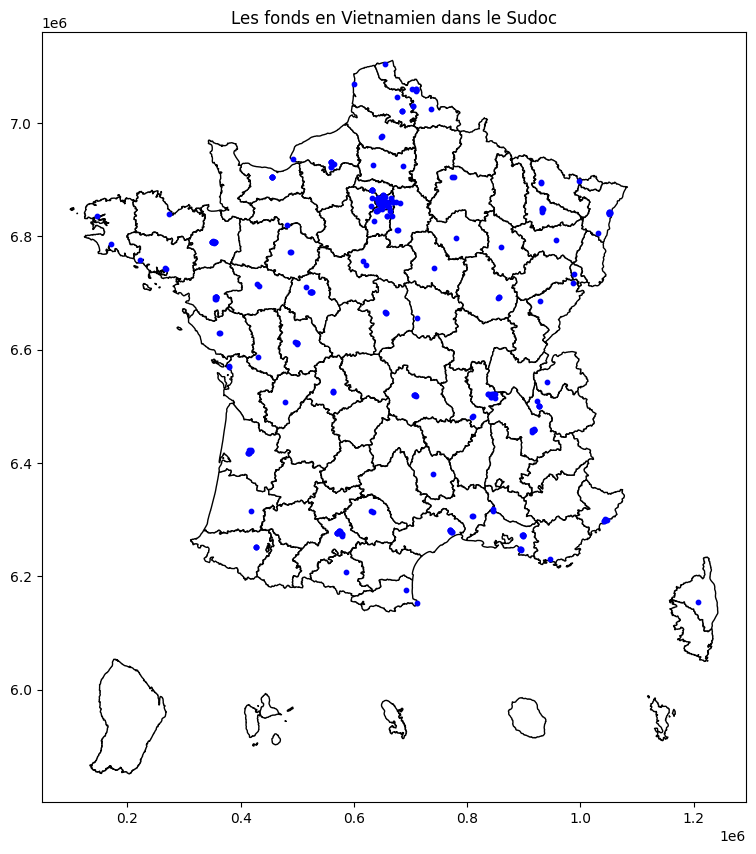

In [ ]:
fig,ax=plt.subplots(figsize=(10,10)) #On créé la figure et les axes.
x_min,y_min,x_max,y_max=fond_de_carte.total_bounds #On limite notre étendue des axes aux limites du fond de carte.
marge=50000
ax.set_xlim(x_min-marge,x_max+marge)
ax.set_ylim(y_min-marge,y_max+marge)
fond_de_carte.plot(ax=ax,color="white",edgecolor="black") #On trace le fond de carte.
gdf.plot(ax=ax, color="blue", markersize=10) #On trace les points.
ax.set_title("Les fonds en "+langue_fr+" dans le Sudoc")

###Carte avec pondérations tenant compte du nombre de notices

Visualisation cartographique avec des données quantitatives concernant le nombre de notices à l'aide d'une *bubblemap*


Text(0.5, 1.0, 'Bubble map des fonds en Vietnamien dans le Sudoc')

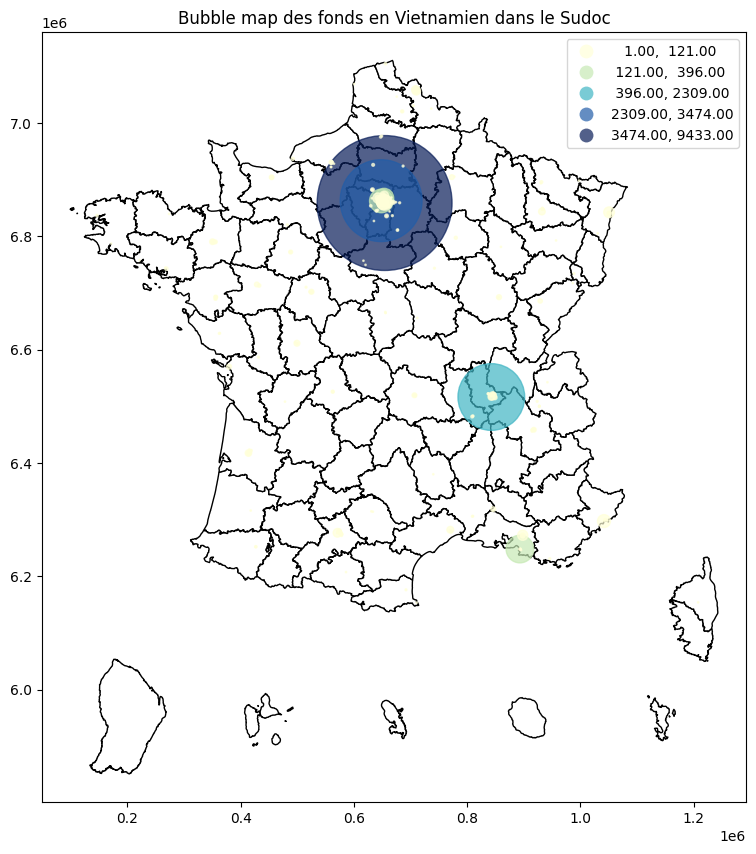

In [ ]:
fig,ax=plt.subplots(figsize=(10,10)) #Pareil que tout à l'heure.
x_min,y_min,x_max,y_max=fond_de_carte.total_bounds
marge = 50000
ax.set_xlim(x_min - marge, x_max + marge)
ax.set_ylim(y_min - marge, y_max + marge)
fond_de_carte.plot(ax=ax, color="white", edgecolor="black")

gdf.plot(ax=ax,column="Notices",cmap="YlGnBu",scheme="natural_breaks",legend=True,markersize=gdf["Notices"],alpha=0.7)  #On trace les points avec la taille basée sur la colonne "Notices". On utilise une échelle de couleurs du jaune vers le bleu.
ax.set_title("Bubble map des fonds en "+langue_fr+" dans le Sudoc")

###Diagramme en barres des 25 premières bibliothèques posssédant des fonds dans la langue choisie en termes de nombre de notices

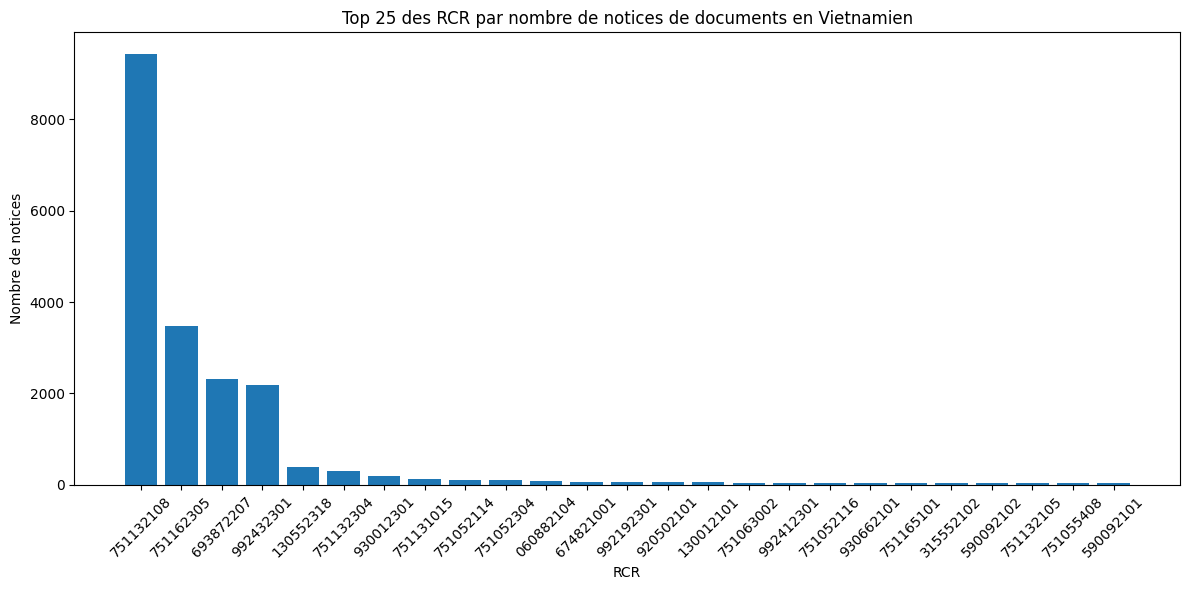

In [ ]:
df_top_25=df_rcr.sort_values("Notices",ascending=False).head(25) #On veut le top 25 du Sudoc en termes de nombres de notices.
plt.figure(figsize=(12,6))
plt.bar(df_top_25["RCR"], df_top_25["Notices"])
plt.xlabel("RCR")
plt.ylabel("Nombre de notices")
plt.title("Top 25 des RCR par nombre de notices de documents en "+langue_fr)
plt.xticks(rotation=45)
plt.tight_layout()